In [10]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob
import os,time

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

import matplotlib.dates as mdates

#import warnings
#warnings.filterwarnings('ignore')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [11]:
datadir          = 'data/'

data_totalcases  = pd.read_csv(datadir + 'total_cases.csv')
data_totaldeaths = pd.read_csv(datadir + 'total_deaths.csv')
data_newcases    = pd.read_csv(datadir + 'new_cases.csv')
data_newdeaths   = pd.read_csv(datadir + 'new_deaths.csv')
data             = pd.read_csv(datadir + 'full_data.csv')
AllCountries     = [name for name in data_totalcases.keys() if name != 'date' and name != 'World']
datatime         = time.ctime(os.path.getmtime(datadir + 'total_cases.csv'))

print('Data downloaded: ' + datatime)

Data downloaded: Wed Mar 18 12:59:37 2020


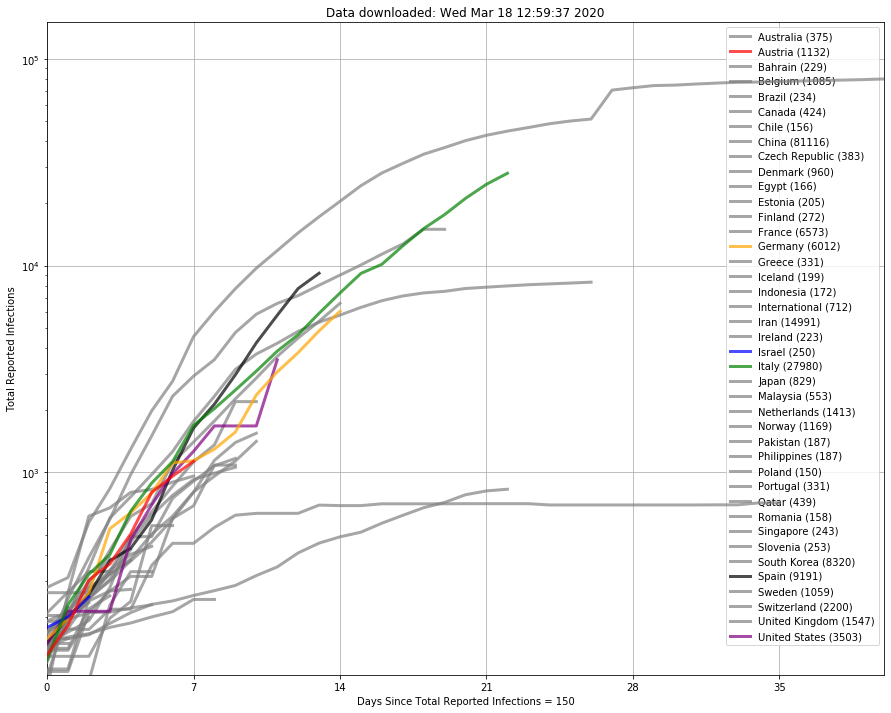

In [16]:
x = np.arange(len(data_totalcases['date']))

threshold = 150

fig, ax = plt.subplots()

lgnd = []
for country in AllCountries:
    totinf = np.nan_to_num(data_totalcases[country])
    if totinf[-1] >= threshold:
        startday = np.argmin((totinf-threshold)**2)
        lgnd.append(country + ' ({:.0f})'.format(totinf[-1]))
        c = 'gray'
        z = 100
        if country == 'Austria':
            c = 'red'
            z = 110
        elif country == 'Italy':
            c = 'green'
            z = 109
        elif country == 'Israel':
            c = 'blue'
            z = 108
        elif country == 'Germany':
            c = 'orange'
            z = 107
        elif country == 'United States':
            c = 'purple'
            z = 106
        elif country == 'Spain':
            c = 'black'
            z = 105
        ax.plot(x[:len(totinf[startday:])], totinf[startday:], c = c, zorder = z, lw = 3, alpha = .7)

plt.legend(lgnd)
plt.xlim([0,40])
ax.xaxis.set_major_locator(MultipleLocator(7))

plt.ylim([threshold*.7,1.5e5])

plt.xlabel(r'Days Since Total Reported Infections = {}'.format(threshold))
plt.ylabel(r'Total Reported Infections')
plt.title('Data downloaded: ' + datatime)
plt.yscale('log')
plt.grid()

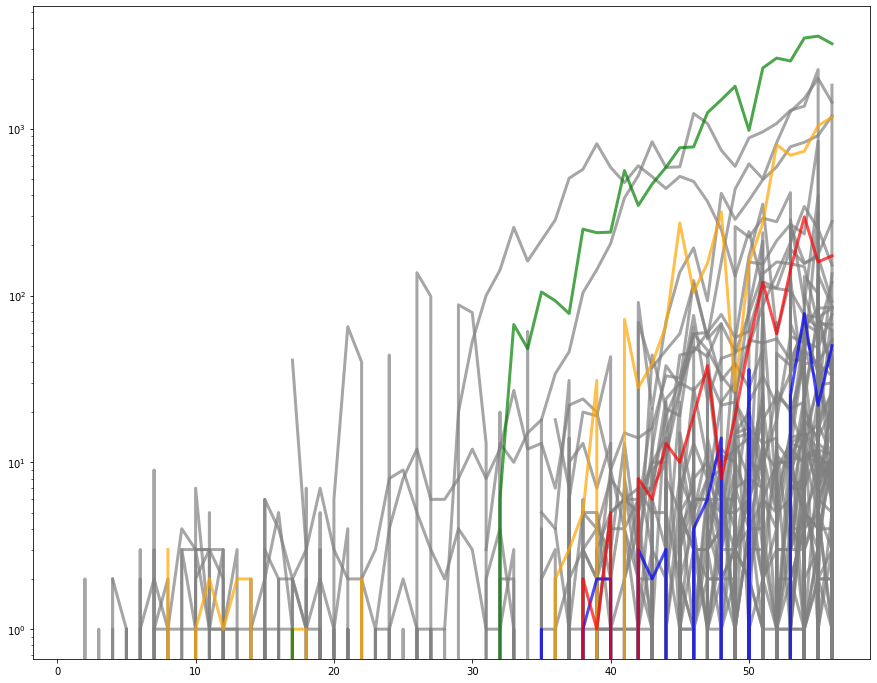

In [85]:
for country in AllCountries:
        lgnd.append(country)
        c = 'gray'
        z = 100
        if country == 'Austria':
            c = 'red'
            z = 110
        elif country == 'Italy':
            c = 'green'
            z = 109
        elif country == 'Israel':
            c = 'blue'
            z = 108
        elif country == 'Germany':
            c = 'orange'
            z = 107
        #ax.plot(x - startday, data_totalcases[country], c = c, zorder = z, lw = 3, alpha = .7)
        if country != 'China':
            plt.plot(x,data_newcases[country], c=c, zorder = z, lw = 3, alpha = .7)

        
plt.yscale('log')

In [82]:
data.where(data['location'] == 'Austria')
          
#          )['date'],data.where(data['location'] == 'Austria')['new_cases'])
#plt.plot(data.where(data['location'] == 'Austria')['date'],data.where(data['location'] == 'Austria')['new_deaths'])
#plt.plot(data.where(data['location'] == 'Austria')['date'],data.where(data['location'] == 'Austria')['total_cases'])
#plt.plot(data.where(data['location'] == 'Austria')['date'],data.where(data['location'] == 'Austria')['total_deaths'])



,date,location,new_cases,new_deaths,total_cases,total_deaths
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2862,NaN,NaN,NaN,NaN,NaN,NaN
2863,NaN,NaN,NaN,NaN,NaN,NaN
2864,NaN,NaN,NaN,NaN,NaN,NaN
2865,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
o